<a href="https://colab.research.google.com/github/shrybhrdwj/Brain_Tumor/blob/main/EnhancedAccuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

shrybhrdwj_brainmriimages07_path = kagglehub.dataset_download('shrybhrdwj/brainmriimages07')

print('Data source import complete.')


Checking contents of /kaggle/input/brainmriimages07:
['Training', 'Testing']
Processed Tr-pi_0532.jpg with median filter
Processed Tr-pi_0282.jpg with median filter
Processed Tr-pi_1401.jpg with median filter
Processed Tr-pi_0914.jpg with median filter
Processed Tr-pi_0691.jpg with median filter
Processed Tr-pi_0972.jpg with median filter
Processed Tr-pi_0818.jpg with median filter
Processed Tr-pi_0463.jpg with median filter
Processed Tr-pi_0930.jpg with median filter
Processed Tr-pi_1323.jpg with median filter
Processed Tr-pi_1347.jpg with median filter
Processed Tr-pi_1354.jpg with median filter
Processed Tr-pi_0704.jpg with median filter
Processed Tr-pi_0789.jpg with median filter
Processed Tr-pi_1445.jpg with median filter
Processed Tr-pi_0605.jpg with median filter
Processed Tr-pi_0882.jpg with median filter
Processed Tr-pi_1274.jpg with median filter
Processed Tr-pi_0339.jpg with median filter
Processed Tr-pi_1271.jpg with median filter
Processed Tr-pi_0458.jpg with median filter

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733137554.303551      94 service.cc:145] XLA service 0x7a6804014eb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733137554.303618      94 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733137554.303623      94 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1733137592.542737      94 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


179/179 ━━━━━━━━━━━━━━━━━━━━ 160s 636ms/step - accuracy: 0.4755 - loss: 1.5886 - val_accuracy: 0.6773 - val_loss: 2.3019 - learning_rate: 1.0000e-04
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 451ms/step - accuracy: 0.7832 - loss: 0.6317 - val_accuracy: 0.6888 - val_loss: 1.1926 - learning_rate: 1.0000e-04
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 449ms/step - accuracy: 0.8476 - loss: 0.4303 - val_accuracy: 0.7628 - val_loss: 1.2454 - learning_rate: 1.0000e-04
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 448ms/step - accuracy: 0.8900 - loss: 0.3347 - val_accuracy: 0.6705 - val_loss: 1.4979 - learning_rate: 1.0000e-04
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 450ms/step - accuracy: 0.9030 - loss: 0.2892 - val_accuracy: 0.8604 - val_loss: 0.4270 - learning_rate: 1.0000e-04
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 448ms/step - accuracy: 0.9227 - loss: 0.2289 - val_accuracy: 0.8635 - val_loss: 0.4780 - learning_rate: 1.0000e-04
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 84s 450ms/step -

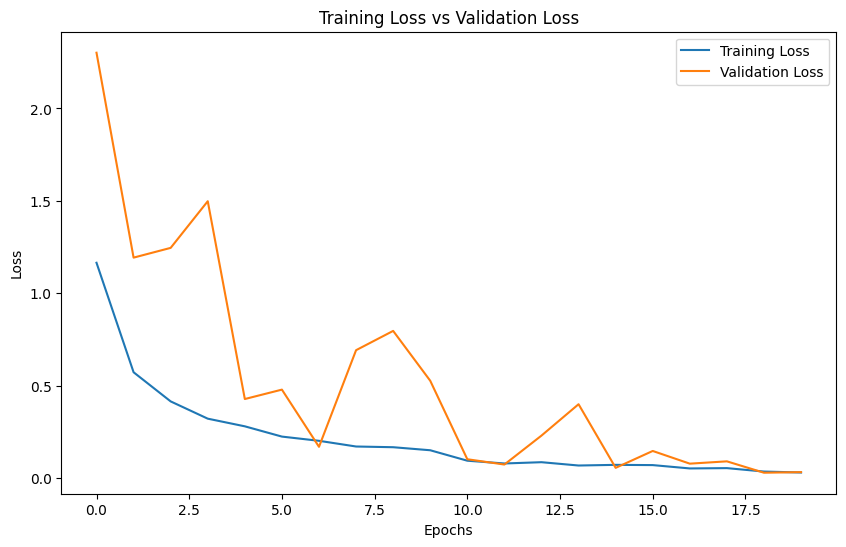

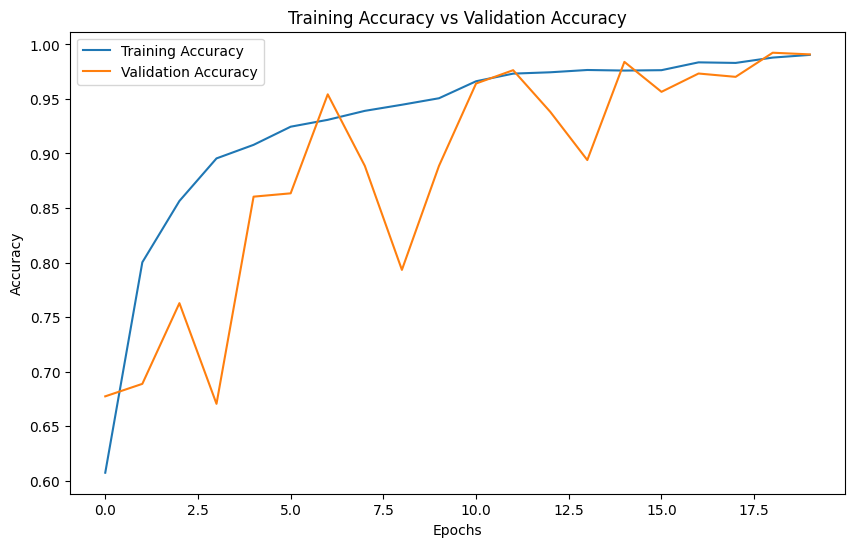

41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step


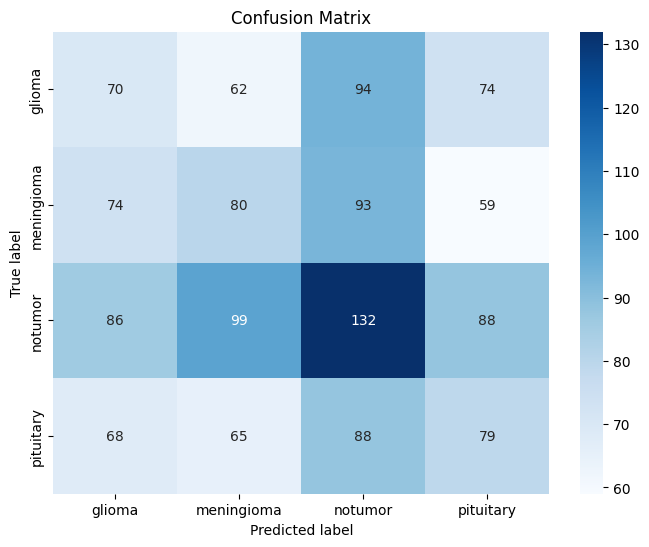

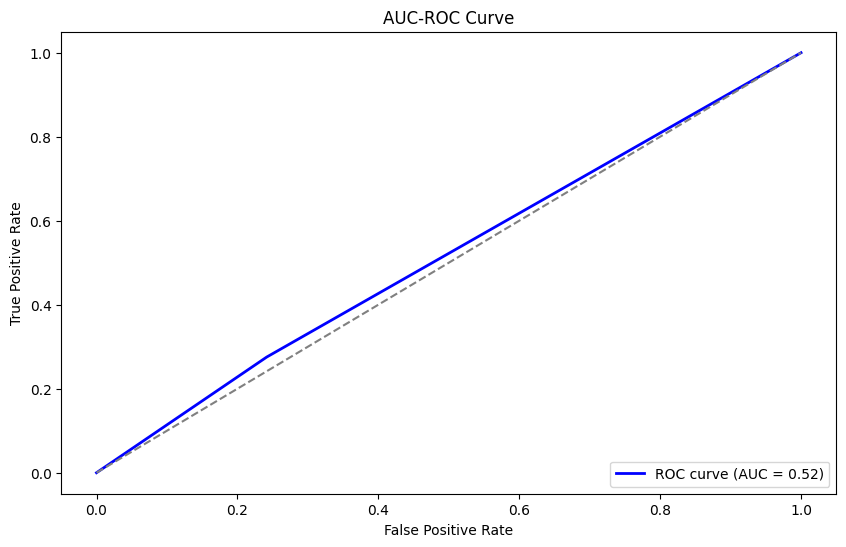

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

# Step 1: Apply Median Filter for image enhancement
def apply_median_filter_to_images(input_dir, output_dir, filter_size=3):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for class_name in os.listdir(input_dir):
        class_folder = os.path.join(input_dir, class_name)

        if not os.path.isdir(class_folder):
            continue

        class_output_folder = os.path.join(output_dir, class_name)
        if not os.path.exists(class_output_folder):
            os.makedirs(class_output_folder)

        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)

            image = cv2.imread(image_path)
            filtered_image = cv2.medianBlur(image, filter_size)

            output_image_path = os.path.join(class_output_folder, image_name)
            cv2.imwrite(output_image_path, filtered_image)
            print(f"Processed {image_name} with median filter")

# Define paths
dataset_path = '/kaggle/input/brainmriimages07'
training_input_dir = os.path.join(dataset_path, 'Training')
testing_input_dir = os.path.join(dataset_path, 'Testing')

print(f"Checking contents of {dataset_path}:")
print(os.listdir(dataset_path))

training_output_dir = '/kaggle/working/Training_filtered'
testing_output_dir = '/kaggle/working/Testing_filtered'

apply_median_filter_to_images(training_input_dir, training_output_dir)
apply_median_filter_to_images(testing_input_dir, testing_output_dir)

# Step 2: Prepare data generators
image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    directory=training_output_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    directory=testing_output_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

# Step 3: Load VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze more layers for better feature extraction
for layer in base_model.layers:
    layer.trainable = True

# Build the complete model with custom classifier
model = Sequential([
    base_model,
    Flatten(),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Implement EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Step 5: Train the model
epochs = 20
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs,
    callbacks=[early_stopping, lr_scheduler]
)

# Step 6: Fine-tune the model more aggressively
for layer in base_model.layers[-20:]:  # Unfreeze more layers
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model for additional epochs
fine_tune_epochs = 5
history_fine_tune = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=fine_tune_epochs,
    callbacks=[early_stopping, lr_scheduler]
)

# Step 7: Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Save the model
model.save("brain_tumor_classifier_vgg16_finetuned.h5")

# Step 8: Plot Training Loss vs Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 9: Plot Training Accuracy vs Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 10: Generate Confusion Matrix
test_generator.reset()
predictions = model.predict(test_generator, verbose=1)

# Convert predictions to one-hot encoding and true labels
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Step 11: AUC-ROC curve
lb = LabelBinarizer()
y_true_bin = lb.fit_transform(y_true)
y_pred_bin = lb.transform(y_pred)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
